<a href="https://colab.research.google.com/github/Alexteir43/sistema-de-registro3/blob/main/Utilizando_chatgpt_como_asistente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong><font color="7b71ff">Análisis de datos con python: Utilizando ChatGPT como asistente</font></strong>


---

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/logos/logo_branca_fundo_azul.png" alt="inserir alt">

# **Aula 1 - Conociendo los datos**

 Zoop es una gran minorista que atiende a todas las regiones de México a través de su e-commerce. Es conocida por la amplia variedad de productos que ofrece, buscando satisfacer a todo tipo de público. Posee una serie de centros de distribución (CDs) para la entrega de sus productos, la mayoría de ellos situados en el estado de Mexico. También posee una cadena de supermercados, y vamos a trabajar como científicos de datos para esta prestigiosa empresa.

### **Accesando a los datos**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos a actuar como científicos de datos en Zoop.

Recibimos datos en formato de archivo JSON, estructurados en listas y diccionarios. El archivo está disponible en una URL de Github.

Necesitamos analizar esos datos para ayudar en las decisiones de la empresa. Programamos en Python y conocemos las bibliotecas de análisis de datos Numpy y Pandas. Por lo tanto, prioriza el uso de estas bibliotecas.

Igualmente, infórmanos cómo podemos leer estos datos en formato JSON y para poder visualizarlos en formato de tabla en Python.

In [ ]:
url = 'https://gist.githubusercontent.com/ahcamachod/24a6235f7cdf255501b5ab4f9b0fd97f/raw/fa329f6d6c1b6b00b3ba457cdc850b53210633ca/zoop_market.json'

In [2]:
url = 'https://gist.githubusercontent.com/ahcamachod/4b964953032a2078d67052ec8fb92e72/raw/8106d7c3f001390744ec3aa657b9847f306c9df8/zoop_supermercado.json'

In [3]:
import pandas as pd
import numpy as np

# Leer el archivo JSON desde la URL
df = pd.read_json(url)

In [4]:
import requests

In [5]:
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

In [ ]:
df

,item_identificador,tienda_identificador,ventas_totales,item,tienda
0,FDB08,OUT018,176503.58,"{'item_peso': 6.055, 'item_contenido_grasa': '...","{'tienda_ano_establecimiento': 2019, 'tienda_t..."
1,DRQ35,OUT049,185758.20,"{'item_peso': 9.3, 'item_contenido_grasa': 'Ba...","{'tienda_ano_establecimiento': 2009, 'tienda_t..."
2,FDD14,OUT018,165983.94,"{'item_peso': 20.7, 'item_contenido_grasa': 'B...","{'tienda_ano_establecimiento': 2019, 'tienda_t..."
3,FDY37,OUT045,314923.40,"{'item_peso': 17.0, 'item_contenido_grasa': 'R...","{'tienda_ano_establecimiento': 2012, 'tienda_t..."
4,FDY59,OUT018,64782.34,"{'item_peso': 8.195, 'item_contenido_grasa': '...","{'tienda_ano_establecimiento': 2019, 'tienda_t..."
...,...,...,...,...,...
8545,FDY08,OUT010,28096.76,"{'item_peso': 9.395, 'item_contenido_grasa': '...","{'tienda_ano_establecimiento': 2008, 'tienda_t..."
8546,FDC41,OUT017,130163.90,"{'item_peso': 15.6, 'item_contenido_grasa': 'B...","{'tienda_ano_establecimiento': 2017, 'tienda_t..."
8547,NCQ53,OUT045,614533.40,"{'item_peso': 17.6, 'item_contenido_grasa': 'B...","{'tienda_ano_establecimiento': 2012, 'tienda_t..."
8548,FDL46,OUT017,164985.24,"{'item_peso': 20.35, 'item_contenido_grasa': '...","{'tienda_ano_establecimiento': 2017, 'tienda_t..."


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>


El DataFrame "df" posee las columnas "item_identificador", "tienda_identificador", "ventas_totales", "item" y "tienda".

Las columnas "item" y "tienda" contienen diccionarios anidados dentro de cada una de las filas. ¿Cómo puedo transformar los datos de los diccionarios y columnas para hacerlos más accesibles en mi DataFrame?


In [6]:
item_df = pd.json_normalize(df['item'])
tienda_df = pd.json_normalize(df['tienda'])


In [7]:
# Concatenar los DataFrames expandidos con el DataFrame original (excluyendo las columnas originales 'item' y 'tienda')
df = pd.concat([df, item_df, tienda_df], axis=1)

In [8]:
df = df.drop(['item', 'tienda'], axis=1)

In [ ]:
df.head()

,item_identificador,tienda_identificador,ventas_totales,item_peso,item_contenido_grasa,item_visibilidad,item_tipo,item_precio,item_cantidad_venta,tienda_ano_establecimiento,tienda_tamano,tienda_tipo_ubicacion,tienda_tipo
0,FDB08,OUT018,176503.58,6.055,Bajo Contenido de Grasa,0.031230,Frutas y Vegetales,160.36,None,2019,Medio,Nivel 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Bajo Contenido de Grasa,0.042357,Bebidas Alcohólicas,123.24,None,2009,Medio,Nivel 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Bajo Contenido de Grasa,0.170500,Enlatados,184.13,None,2019,Medio,Nivel 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,None,2012,NaN,Nivel 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Bajo Contenido de Grasa,0.000000,Dulcería,93.15,None,2019,Medio,Nivel 3,Supermercado Tipo 2


# **Clase 2 - Exploración de los dados**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

El DataFrame "df" contiene datos referentes a las ventas de diversos productos en varias tiendas del supermercado. Se proporcionan los IDs de productos y los IDs de tiendas que comercializaron esos productos, el total recaudado en ventas, así como descripciones sobre el producto vendido y la tienda que lo vendió.

Estamos iniciando la etapa de exploración de datos, en la cual deseamos conocer los valores informados e identificar si existen valores ausentes, duplicados y otras inconsistencias.

Construye un código para ejecutar la etapa de exploración de datos usando Python, comentando el paso a paso de manera clara y objetiva.

No es necesario utilizar "print()" para mostrar el resultado de las consultas.

In [ ]:
# Calcular las estadísticas descriptivas para las columnas numéricas
# Nos dará una idea del rango de valores, medias, medianas, y posibles outliers
df.describe()

,ventas_totales,item_peso,item_visibilidad,item_precio,tienda_ano_establecimiento
count,8.550000e+03,7081.000000,8550.000000,8550.000000,8550.000000
mean,2.181949e+05,12.855023,0.066150,141.007453,2007.830409
std,1.708098e+05,4.643508,0.051578,62.333062,8.372541
min,3.329000e+03,4.555000,0.000000,31.290000,1995.000000
25%,8.349132e+04,8.770000,0.027024,93.787500,1997.000000
50%,1.794331e+05,12.600000,0.053978,142.935000,2009.000000
75%,3.100963e+05,16.850000,0.094646,185.760000,2014.000000
max,1.308696e+06,21.350000,0.328391,266.890000,2019.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   item_identificador          8550 non-null   object 
 1   tienda_identificador        8550 non-null   object 
 2   ventas_totales              8550 non-null   float64
 3   item_peso                   7081 non-null   float64
 4   item_contenido_grasa        8550 non-null   object 
 5   item_visibilidad            8550 non-null   float64
 6   item_tipo                   8550 non-null   object 
 7   item_precio                 8550 non-null   float64
 8   item_cantidad_venta         0 non-null      object 
 9   tienda_ano_establecimiento  8550 non-null   int64  
 10  tienda_tamano               6133 non-null   object 
 11  tienda_tipo_ubicacion       8550 non-null   object 
 12  tienda_tipo                 8550 non-null   object 
dtypes: float64(4), int64(1), object(8

In [ ]:
#- Verificar la presencia de valores ausentes en cada columna
# Esto ayuda a detectar columnas con datos incompletos y definir estrategias para manejar los valores ausentes
df.isnull().sum()

,0
item_identificador,0
tienda_identificador,0
ventas_totales,0
item_peso,1469
item_contenido_grasa,0
item_visibilidad,0
item_tipo,0
item_precio,0
item_cantidad_venta,8550
tienda_ano_establecimiento,0


In [9]:
#- Comprobar la cantidad de filas duplicadas
# Los datos duplicados pueden afectar los resultados del análisis, así que es importante detectarlos y decidir si deben eliminarse
df.duplicated().sum()

27

In [ ]:
#- Revisar la cantidad de valores únicos en columnas relevantes
# Esto permite identificar columnas categóricas con una baja variedad de valores, lo cual podría indicar errores o valores predeterminados incorrectos
# lo cual podría indicar erores o valores prdeterminados incorrectos

df.nunique()

,0
item_identificador,1559
tienda_identificador,10
ventas_totales,3493
item_peso,415
item_contenido_grasa,5
item_visibilidad,7880
item_tipo,16
item_precio,4839
item_cantidad_venta,0
tienda_ano_establecimiento,9


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

El DataFrame "df" contiene datos relacionados con las ventas durante un trimestre de un supermercado. Deseo utilizarlo para verificar el desempeño de esas ventas.

Durante la exploración del "df", identificamos algunas inconsistencias, como:

* Filas duplicadas,
* Valores nulos y
* Datos categóricos que fueron escritos de manera no estandarizada, dando la idea de que existen más categorías de las que realmente existen.

¿Qué debo hacer para garantizar que esas inconsistencias que encontré no afecten mi análisis?

# **Clase 3 - Limpieza y tratamiento de los datos**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>


Durante la exploración del DataFrame "df", identificamos 27 filas duplicadas usando "df.duplicated().sum()".

El objetivo es analizar los datos en "df" para medir el desempeño de una empresa durante un trimestre de ventas.

¿Qué debemos hacer con los datos duplicados para garantizar que no haya impacto negativo en el análisis?

In [10]:
 # Eliminar filas duplicadas
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>


Identificamos tres columnas en "df" que presentan valores nulos:

* La columna "item_cantidad_venta" tiene 8550 filas con valores nulos.
* La columna "item_peso" tiene 1469 filas con valores nulos.
* La columna "tienda_tamano" tiene 2417 filas con valores nulos.

Hubo un gran número de ventas de artículos durante el trimestre, y no hay justificación para la ausencia de datos en la columna "item_cantidad_venta", lo que la convierte en una columna prescindible.

La columna "item_peso" contiene valores del tipo float, representando el peso en gramos de los productos.

La columna "tienda_tamano" tiene tres categorías de tamaño para supermercados.

¿Cómo debo manejar estos datos nulos para garantizar que mi análisis no se vea afectado?

In [12]:
# Eliminar la columna 'item_cantidad_venta' por su falta de datos relevantes
df = df.drop(columns=['item_cantidad_venta'])

In [13]:
 # Rellenar valores nulos en 'item_peso' con la mediana
df['item_peso'] = df['item_peso'].fillna(df['item_peso'].mean())

In [14]:
df['tienda_tamano'] = df['tienda_tamano'].fillna('Desconocido')

In [15]:
df.isnull().sum()

,0
item_identificador,0
tienda_identificador,0
ventas_totales,0
item_peso,0
item_contenido_grasa,0
item_visibilidad,0
item_tipo,0
item_precio,0
tienda_ano_establecimiento,0
tienda_tamano,0


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

La columna "item_conteudo_grasa" del DataFrame "df" presenta 5 valores únicos dados por: 'Bajo Contenido de Grasa', 'Regular', 'BTG', 'reg' y 'bajo contenido de grasa'.

Los valores únicos de la columna "item_contenido_grasa" deberían ser solo 'Bajo Contenido de Grasa' y 'Regular', pero fueron insertados sin estandarización, lo que resultó en más categorías de las deseadas.

¿Cómo puedo ajustar los datos de la columna "item_contenido_grasa" para mantener solo las dos categorías estándar?

In [16]:
df['item_contenido_grasa'].value_counts().index

Index(['Bajo Contenido de Grasa', 'Regular', 'BCG', 'reg',
       'bajo contenido de grasa'],
      dtype='object', name='item_contenido_grasa')

In [17]:
# Reemplazar los valores inconsistentes con las categorías estándar
diccionario = {'bajo contenido de grasa':'Bajo Contenido de Grasa',
               'BCG':'Bajo Contenido de Grasa',
               'reg': 'Regular',
               'regular': 'Regular'}

df['item_contenido_grasa'] = df['item_contenido_grasa'].replace(diccionario)

In [18]:
df['item_contenido_grasa'].value_counts().index


Index(['Bajo Contenido de Grasa', 'Regular'], dtype='object', name='item_contenido_grasa')

In [ ]:
df.head()

,item_identificador,tienda_identificador,ventas_totales,item_peso,item_contenido_grasa,item_visibilidad,item_tipo,item_precio,tienda_ano_establecimiento,tienda_tamano,tienda_tipo_ubicacion,tienda_tipo
0,FDB08,OUT018,176503.58,6.055,Bajo Contenido de Grasa,0.031230,Frutas y Vegetales,160.36,2019,Medio,Nivel 3,Supermercado Tipo 2
1,DRQ35,OUT049,185758.20,9.300,Bajo Contenido de Grasa,0.042357,Bebidas Alcohólicas,123.24,2009,Medio,Nivel 1,Supermercado Tipo 1
2,FDD14,OUT018,165983.94,20.700,Bajo Contenido de Grasa,0.170500,Enlatados,184.13,2019,Medio,Nivel 3,Supermercado Tipo 2
3,FDY37,OUT045,314923.40,17.000,Regular,0.026623,Enlatados,144.25,2012,Desconocido,Nivel 2,Supermercado Tipo 1
4,FDY59,OUT018,64782.34,8.195,Bajo Contenido de Grasa,0.000000,Dulcería,93.15,2019,Medio,Nivel 3,Supermercado Tipo 2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 8549
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   item_identificador          8523 non-null   object 
 1   tienda_identificador        8523 non-null   object 
 2   ventas_totales              8523 non-null   float64
 3   item_peso                   8523 non-null   float64
 4   item_contenido_grasa        8523 non-null   object 
 5   item_visibilidad            8523 non-null   float64
 6   item_tipo                   8523 non-null   object 
 7   item_precio                 8523 non-null   float64
 8   tienda_ano_establecimiento  8523 non-null   int64  
 9   tienda_tamano               8523 non-null   object 
 10  tienda_tipo_ubicacion       8523 non-null   object 
 11  tienda_tipo                 8523 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


# **Clase 4 - Visualización de datos**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Los datos del DataFrame "df" están limpios y tratados. Ahora, deseo iniciar la etapa de construcción de gráficos para crear visualizaciones que ofrezcan un buen soporte al análisis del desempeño de ventas de la empresa.

Las columnas disponibles en "df" son las siguientes:
- "item_identificador": Número único asignado a cada ítem
- "tienda_identificador": Nombre único de la tienda
- "ventas_totales": Valor obtenido en ventas totales
- "item_peso": Peso del ítem en gramos
- "item_contenido_grasa": Contenido de grasa del ítem
- "item_visibilidad": Valor de posicionamiento de cada ítem
- "item_tipo": Tipo de utilidad del ítem
- "item_precio": Precio unitario del ítem
- "tienda_ano_establecimiento": Año de Establecimiento de la tienda
- "tienda_tamano": Tamaño de la tienda
- "tienda_tipo_ubicacion": Tipo de ubicación de la tienda
- "tienda_tipo": Tipo de tienda

El objetivo es encontrar patrones o información que se destaquen cuando nos referimos al total obtenido en ventas especificado en la columna "ventas_totales".

Con base en la información proporcionada, ¿qué tipos de visualizaciones serían útiles para alcanzar el objetivo de analizar el desempeño de ventas?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>


El DataFrame "df" contiene la columna "ventas_totales", que informa el valor en reales obtenido en ventas de productos por varias tiendas.

Además, en "df", tenemos la columna "tienda_tipo" con 4 categorías de tipo para tiendas: 'Supermercado Tipo 1', 'Supermercado Tipo 2', 'Mercado', 'Supermercado Tipo 3'.

Deseo crear una visualización que permita identificar el total obtenido en ventas para las cuatro categorías de tipo de tienda y representarlas en un gráfico de barras.

Los datos en la columna "ventas_totales" deben ser agrupados por las categorías de "tienda_tipo".

La figura de la gráfica debe seguir la identidad visual de la tienda, con el fondo de la figura y de la gráfica en color "#ebebeb" y las barras en color "#e23155".

Además, es necesario mostrar el total de las ventas en millones sobre cada columna, con el texto de esa información en color "#19325c" y la estructura "MXN$ valor M".

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

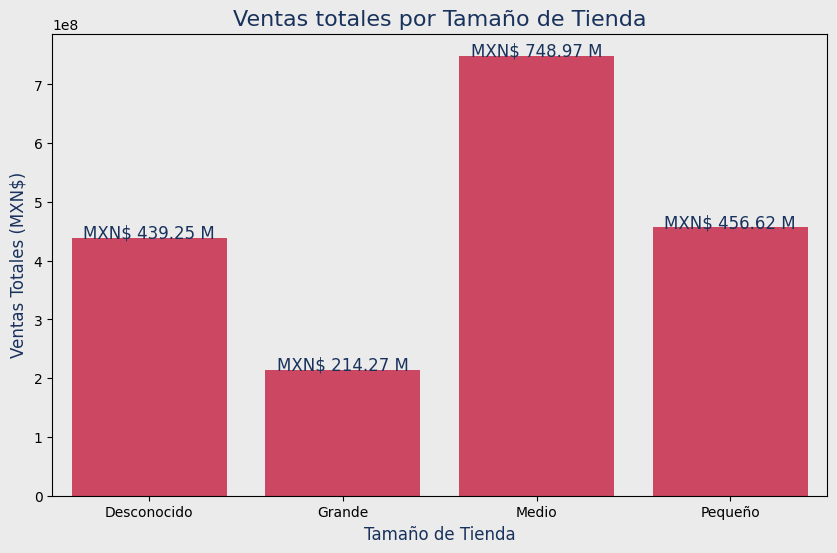

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sumar las ventas totales por tamaño de tienda
ventas_por_tamaño = df.groupby('tienda_tamano')['ventas_totales'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=ventas_por_tamaño.index, y=ventas_por_tamaño.values, color='#e23155')

# Personalización de la figura y fondo del gráfico
plt.gcf().set_facecolor('#ebebeb') #Fondo de la figura
plt.gca().set_facecolor('#ebebeb') #Fondo del gráfico

# Titulos y etiquetas
plt.title('Ventas totales por Tamaño de Tienda', fontsize=16, color='#19325c')
plt.xlabel('Tamaño de Tienda', fontsize=12, color='#19325c')
plt.ylabel('Ventas Totales (MXN$)', fontsize=12, color='#19325c')

# Mostrar el total de las ventas encima de las barras
for i, valor in enumerate(ventas_por_tamaño.values):
  plt.text(i, valor +0.1, f'MXN$ {valor/1e6:.2f} M', ha='center', color='#19325c', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=0) #Asegura que las etiquetas del eje x estén horizontales
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

El DataFrame "df" contiene la columna "ventas_totales", que informa el valor en reales obtenido en ventas de productos por varias tiendas.

Además, en "df", tenemos la columna "item_tipo" con 16 categorías de productos.

Deseo crear una visualización que permita identificar el total obtenido en ventas por categorías de productos en un gráfico de barras horizontales.

Los datos en la columna "ventas_totales" deben agruparse por las categorías de "item_tipo".

La figura de la representación debe seguir la identidad visual de la tienda, con el fondo de la figura y del gráfico en el color "#ebebeb".

Las barras deben estar en el color "#e23155".

Los valores de las barras deben estar ordenados para mantener un aspecto de embudo.

Además, es necesario mostrar el total de las ventas en millones dentro o al lado de cada barra, con el texto de esa información en el color "#19325c" y en la estructura "MXN$ valor M".

No muestres la cuadrícula en el gráfico.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

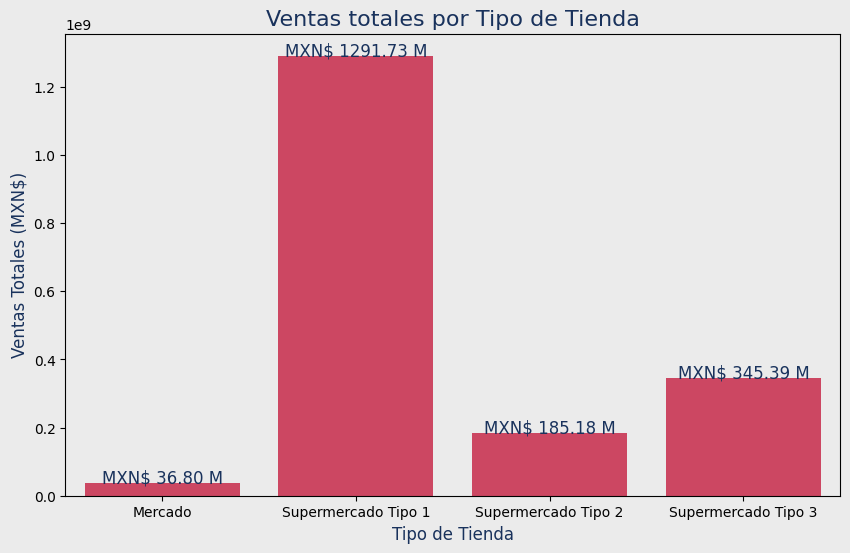

In [20]:
# Agrupar las ventas totales por tipo de tienda
ventas_por_tipo_tienda = df.groupby('tienda_tipo')['ventas_totales'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=ventas_por_tipo_tienda.index, y=ventas_por_tipo_tienda.values, color='#e23155')

# Personalización de la figura y fondo del gráfico
plt.gcf().set_facecolor('#ebebeb') #Fondo de la figura
plt.gca().set_facecolor('#ebebeb') #Fondo del gráfico

# Titulos y etiquetas
plt.title('Ventas totales por Tipo de Tienda', fontsize=16, color='#19325c')
plt.xlabel('Tipo de Tienda', fontsize=12, color='#19325c')
plt.ylabel('Ventas Totales (MXN$)', fontsize=12, color='#19325c')

# Mostrar el total de las ventas encima de las barras
for i, valor in enumerate(ventas_por_tipo_tienda.values):
  plt.text(i, valor +0.1, f'MXN$ {valor/1e6:.2f} M', ha='center', color='#19325c', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=0) #Asegura que las etiquetas del eje x estén horizontales
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

El DataFrame "df" contiene la columna "ventas_totales", que informa el valor en reales obtenido en ventas de productos por varias tiendas.

Además, en "df", tenemos la columna "tienda_tamano" con 4 categorías de tamaño para tiendas: 'Grande', 'Medio', 'Pequeño' y 'No registrado'.

Deseo crear una visualización que permita identificar el total obtenido en ventas para las cuatro categorías de tamaño de tienda y representarlas en un gráfico de barras.

Los datos en la columna "ventas_totales" necesitan ser agrupados por las categorías de "tienda_tamano".

La figura del gráfico debe seguir la identidad visual de la tienda, con el fondo de la figura y del gráfico en color "#ebebeb" y las barras en color "#e23155".

Además, es necesario mostrar el total de las ventas en millones encima de cada columna, con el texto de esta información en color "#19325c" y la estructura "MXN $ valor M".

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

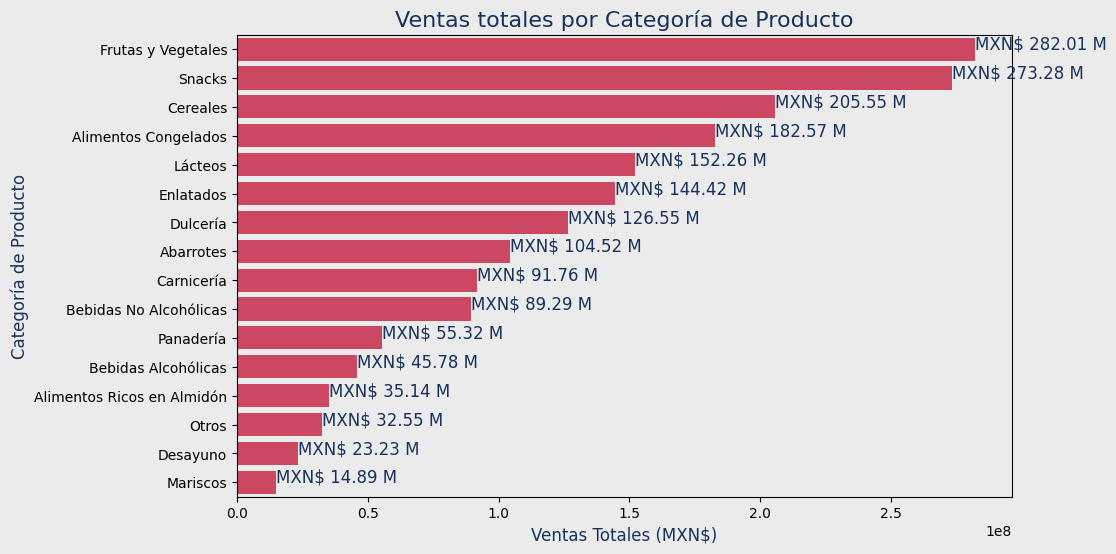

In [23]:
# Agrupar las ventas totales por tipo de producto
ventas_por_tipo_producto = df.groupby('item_tipo')['ventas_totales'].sum()

# Ordenar los valores para mantener un aspecto de embudo (de menor a mayor)
ventas_por_tipo_producto = ventas_por_tipo_producto.sort_values(ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10,6))
sns.barplot(x=ventas_por_tipo_producto.values, y=ventas_por_tipo_producto.index, color='#e23155')

# Personalización de la figura y fondo del gráfico
plt.gcf().set_facecolor('#ebebeb') #Fondo de la figura
plt.gca().set_facecolor('#ebebeb') #Fondo del gráfico

# Titulos y etiquetas
plt.title('Ventas totales por Categoría de Producto', fontsize=16, color='#19325c')
plt.ylabel('Categoría de Producto', fontsize=12, color='#19325c')
plt.xlabel('Ventas Totales (MXN$)', fontsize=12, color='#19325c')

# Mostrar el total de las ventas encima de las barras
for i, valor in enumerate(ventas_por_tipo_producto.values):
  plt.text(valor +0.1, i, f'MXN$ {valor/1e6:.2f} M', ha='left', color='#19325c', fontsize=12)

# No mostrar la cuadrícula
plt.grid(False)

# Mostrar el gráfico
plt.show()

#Ventas por contenido de grasa


<ipython-input-26-fcbe524b40d7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_grasa.index, y=ventas_por_grasa.values, palette=colores)


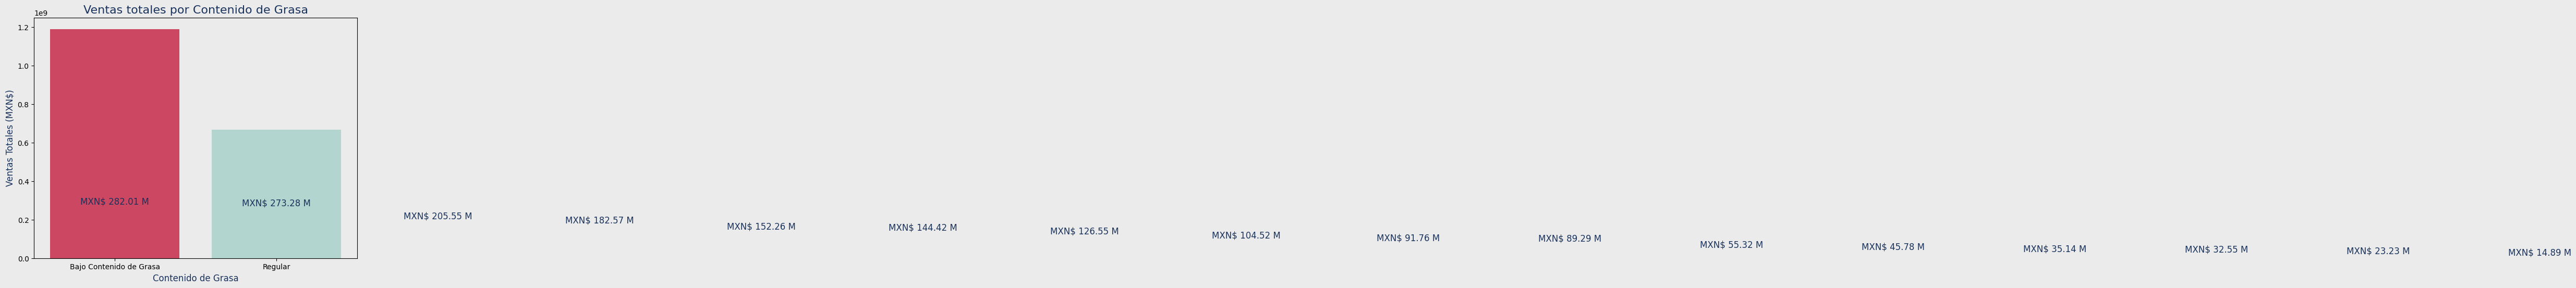

In [26]:
# Agrupar las ventas totales por la categoría de contenido de grasa
ventas_por_grasa = df.groupby('item_contenido_grasa')['ventas_totales'].sum()

# Crear un gráfico de columnas
plt.figure(figsize=(8,6))

# Colores específicos para las categorías
colores = {'Bajo Contenido de Grasa': '#e23155', 'Regular': '#acdcd3'}

#Crea el gráfico de columnas
sns.barplot(x=ventas_por_grasa.index, y=ventas_por_grasa.values, palette=colores)

# Personalización de la figura y fondo del gráfico
plt.gcf().set_facecolor('#ebebeb') #Fondo de la figura
plt.gca().set_facecolor('#ebebeb') #Fondo del gráfico

# Titulos y etiquetas
plt.title('Ventas totales por Contenido de Grasa', fontsize=16, color='#19325c')
plt.xlabel('Contenido de Grasa', fontsize=12, color='#19325c')
plt.ylabel('Ventas Totales (MXN$)', fontsize=12, color='#19325c')

# Mostrar el total de las ventas encima de las barras
for i, valor in enumerate(ventas_por_tipo_producto.values):
  plt.text(i, valor +0.1, f'MXN$ {valor/1e6:.2f} M', ha='center', color='#19325c', fontsize=12)

# Mostrar el gráfico
plt.show()